In [45]:
import numpy as np
import matplotlib.pyplot as plt


### EVERYTHING IS BASED on: Lloyd N. Trefethen: Approximation Theory and Approximation Practice

In [43]:
pip install chebpy

Note: you may need to restart the kernel to use updated packages.


***************************************



Everything in **bold text** is from the book. Do not plagiarism!


*************************

In [14]:
n=16

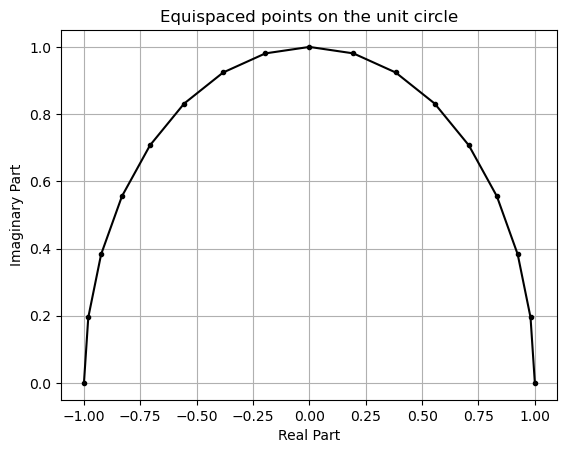

In [16]:
tt = np.linspace(0, np.pi, n+1)
zz = np.exp(1j*tt)

plt.plot(zz.real, zz.imag, '.-k')
plt.xlabel('Real Part')
plt.ylabel('Imaginary Part')
plt.title('Equispaced points on the unit circle')
plt.grid(True)
plt.show()

**The Chebyshev points associated with the parameter n are the real parts of these points** (taking the real part, means to cosnider only the real component of each complex number in the set and ignore the imaginary component. So that is, a +bi, we ignore the imaginary component (b))

**Let us add the Chebyshev points to the plot**

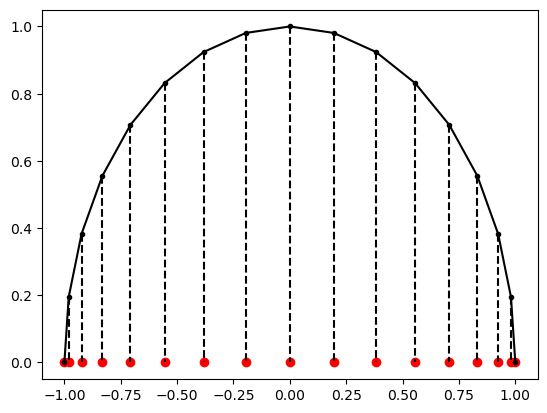

In [27]:
# Additional code to compute Chebyshev points
x_j = np.cos(np.linspace(0, np.pi, n+1))

# Plot Chebyshev points as red dots on the real axis
plt.plot(x_j, np.zeros_like(x_j), 'or', label='Chebyshev points')

# Draw lines between zz and x_j with black dashed lines
for j in range(1, n):
    plt.plot([zz[j].real, x_j[j]], [zz[j].imag, 0], 'k--')

# Plotting zz in the complex plane with black lines and points
plt.plot(zz.real, zz.imag, '.-k', label=r'$e^{1j \cdot tt}$')

**They cluster near 1 and -1, with average spacing as $n \rightarrow \infty$ being given by a density function with square root singularities at both ends**

**Let ${f_i},0<=j<=n$ be a set of numbers, which may or may not come from sampling a function f(x) at the Chebyshev points. Then there exist a unique polynomial p of degree n that interpolates these data, i.e., $p(x_j)=f_j$ for each $j$**

**When we say "of degree n", we mean of degree less than or equal to n, and we let P_n denote the set of all such polynomials:**

$P_n =$ {polynomials of degree at most n}.

**The existence and uniqueness of polynomial interpolants applies for any distinct set of interpolation points. In the case of Chebyshev points, we call the polynomial the *Chebyshev interpolant*.**



## INTERESSANT


**Polynomial interpolants through equally spaced points have terrible properties. Polynomial interpolants through Chebyshev points, however, are excellent. It is the clustering near the ends of the interval that makes the difference, and other sets of points with similar clustering, like Legende points, have simialrly good behaviour.**


**What makes Chebyshev effective is that each one has approximately the same average distance from the others, as measured in the sense of the geometric mean. On the interval [-1,1], this average distance is about 1/2.**

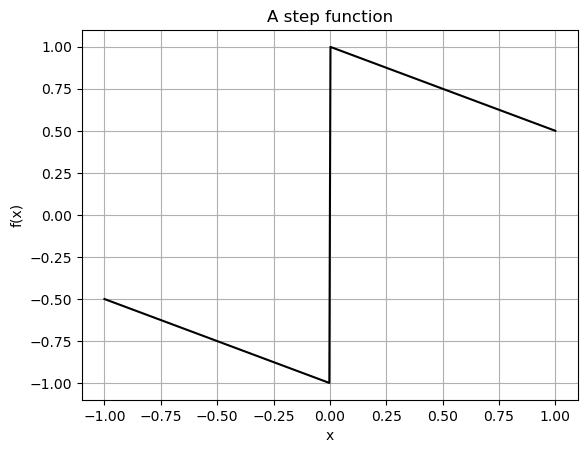

In [47]:
# Define a function similar to the Chebfun definition
def f(x):
    return np.sign(x) - x/2

# Generate x values from -1 to 1
x = np.linspace(-1, 1, 400)

# Generate y values using the function f
y = f(x)

# Plotting
plt.plot(x, y, 'k')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('A step function')
plt.grid(True)
plt.show()


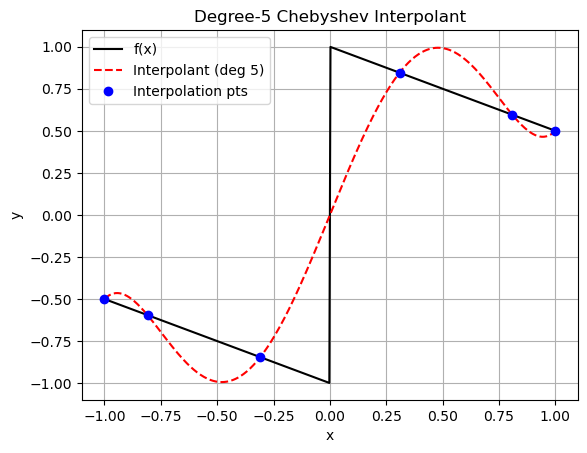

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import BarycentricInterpolator

# Define function
def f(x):
    return np.sign(x) - x/2

# Define domain and generate x values
x = np.linspace(-1, 1, 400)
y = f(x)

# Choose 6 Chebyshev points in the interval [-1, 1]
n = 5  # degree of the polynomial
x_cheb = np.cos(np.linspace(0, np.pi, n+1))
y_cheb = f(x_cheb)

# Create interpolating polynomial
p = BarycentricInterpolator(x_cheb, y_cheb)

# Evaluate interpolant at x
y_p = p(x)

# Plot original function and interpolant
plt.plot(x, y, 'k', label='f(x)')
plt.plot(x, y_p, 'r--', label='Interpolant (deg 5)')
plt.plot(x_cheb, y_cheb, 'bo', label='Interpolation pts')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Degree-5 Chebyshev Interpolant')
plt.legend()
plt.grid(True)
plt.show()


## **Similarly, here is the Chebyshev interpolant of degree 25**

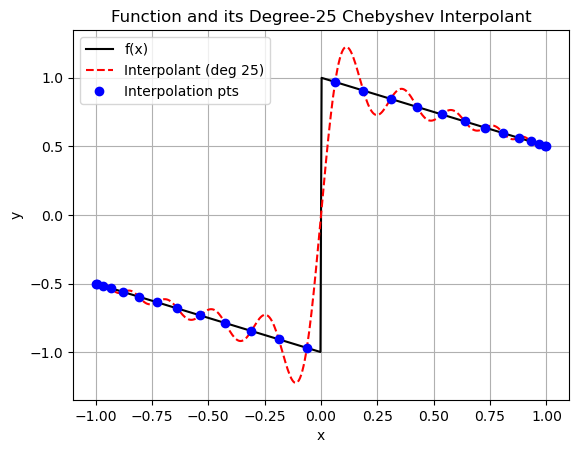

In [50]:
# Define the function
def f(x):
    return np.sign(x) - x/2

# Generate x values from -1 to 1
x = np.linspace(-1, 1, 400)
y = f(x)

# Choose 26 Chebyshev points in the interval [-1, 1]
n = 25  # degree of the polynomial
x_cheb = np.cos(np.linspace(0, np.pi, n+1))
y_cheb = f(x_cheb)

# Create interpolating polynomial
p = BarycentricInterpolator(x_cheb, y_cheb)

# Evaluate interpolant at x
y_p = p(x)

# Plot original function and interpolant
plt.plot(x, y, 'k', label='f(x)')
plt.plot(x, y_p, 'r--', label=f'Interpolant (deg {n})')
plt.plot(x_cheb, y_cheb, 'bo', label='Interpolation pts')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Function and its Degree-25 Chebyshev Interpolant')
plt.legend()
plt.grid(True)
plt.show()

## **Here are a more complicated function and its interpolant of degree 100:**

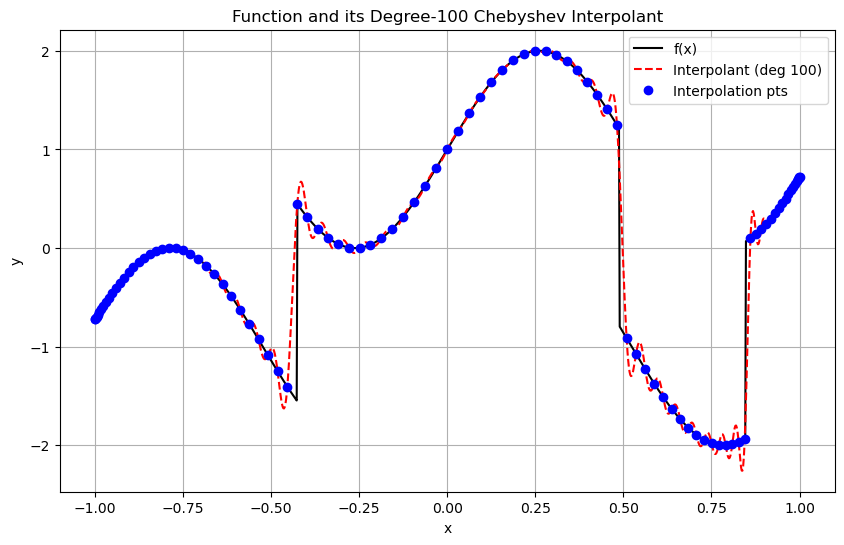

In [51]:
# Define the function
def f(x):
    return np.sin(6*x) + np.sign(np.sin(x + np.exp(2*x)))

# Generate x values from -1 to 1
x = np.linspace(-1, 1, 1000)
y = f(x)

# Choose 101 Chebyshev points in the interval [-1, 1]
n = 100  # degree of the polynomial
x_cheb = np.cos(np.linspace(0, np.pi, n+1))
y_cheb = f(x_cheb)

# Create interpolating polynomial
p = BarycentricInterpolator(x_cheb, y_cheb)

# Evaluate interpolant at x
y_p = p(x)

# Plot original function and interpolant
plt.figure(figsize=[10,6])
plt.plot(x, y, 'k', linewidth=1.5, label='f(x)')
plt.plot(x, y_p, 'r--', linewidth=1.5, label=f'Interpolant (deg {n})')
plt.plot(x_cheb, y_cheb, 'bo', label='Interpolation pts')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Function and its Degree-100 Chebyshev Interpolant')
plt.legend()
plt.grid(True)
plt.show()

**Another way is by giving it an explicit vector of data rather than a function to sample, in which case it interprets the vector as data for a Chebyshev interpolant of the appropriate order.**

## **Here for example is the interpolant of degree 100 through random data values at 100 Chebyshev points in [-1,1]:**

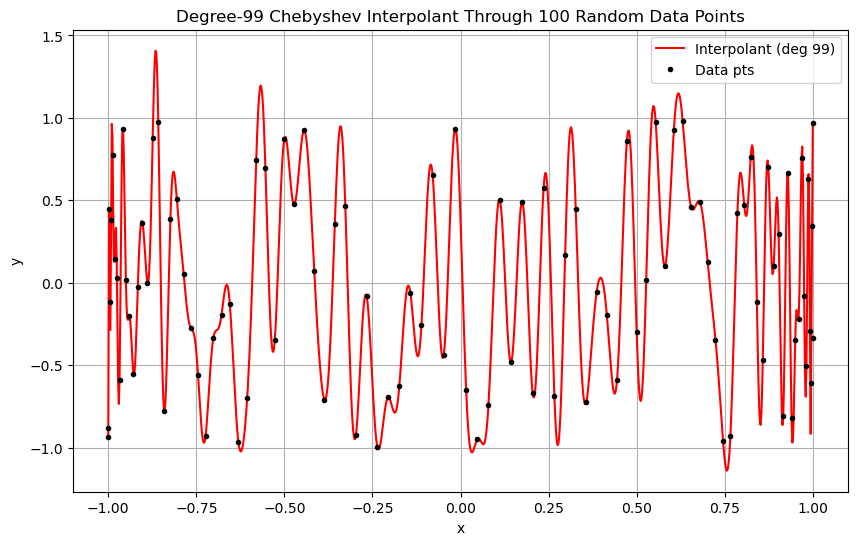

In [54]:
# Seed for reproducibility
np.random.seed(56)

# Generate random data values
y_data = 2 * np.random.rand(100) - 1

# Choose 100 Chebyshev points in the interval [-1, 1]
n = 99  # degree of the polynomial
x_cheb = np.cos(np.linspace(0, np.pi, n+1))

# Create interpolating polynomial
p = BarycentricInterpolator(x_cheb, y_data)

# Evaluate interpolant at x
x = np.linspace(-1, 1, 1000)
y_p = p(x)

# Plot interpolant and data points
plt.figure(figsize=[10,6])
plt.plot(x, y_p, 'r-', linewidth=1.5, label=f'Interpolant (deg {n})')
plt.plot(x_cheb, y_data, '.k', label='Data pts')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Degree-99 Chebyshev Interpolant Through 100 Random Data Points')
plt.legend()
plt.grid(True)
plt.show()


**This experiment illustrates how robust Chebyshev interpolation is. If we had taken a milltion points instead of 100, the result would not have been much different mathematically, though it would have been harder to plot.**

# MORAL OF THE STORY SO FAR:

#### Polynomial interpolants in equispaced points in [-1,1] have very poor approximation porpoerties, but interpolants in Chebyshev points, which cluster near +/- 1, are excellen

**The Chebyshev setting is the one of terest in this book, concerning a variable $x$ and a function $f$ defined on**
$$
\text { Chebyshev: } \quad x \in[-1,1], \quad f(x) \approx \sum_{k=0}^n a_k T_k(x)
$$
Here $T_k$ is the kth Chebyshev polynomial.

**We have seen the (n+1)-point chebyshev grid,**

Chebyshev points: $x_j=cos(j\pi/n), 0<=j<=n$

**The kth Chebyshev polynomial can be defined as the real part of the function $z^k$ on the unit circle:**

$x=\frac{1}{2}(z+z^{-1})=cos\theta, \theta=cos^{-1}x$

$T_k(x)=\frac{1}{2}(z^k+z^{-k})=cos(k\theta)$   (3.8)

**It follows from (3.8) that $T_k$ satisfies -1<=T_k(x)<=1 for $x \in [-1,1]$ and takes alternating value +/- 1 at the k+1 Chebyshev points. What is not obvious is that T_k is a polynomial.**

### $T_k$ is a polynomial

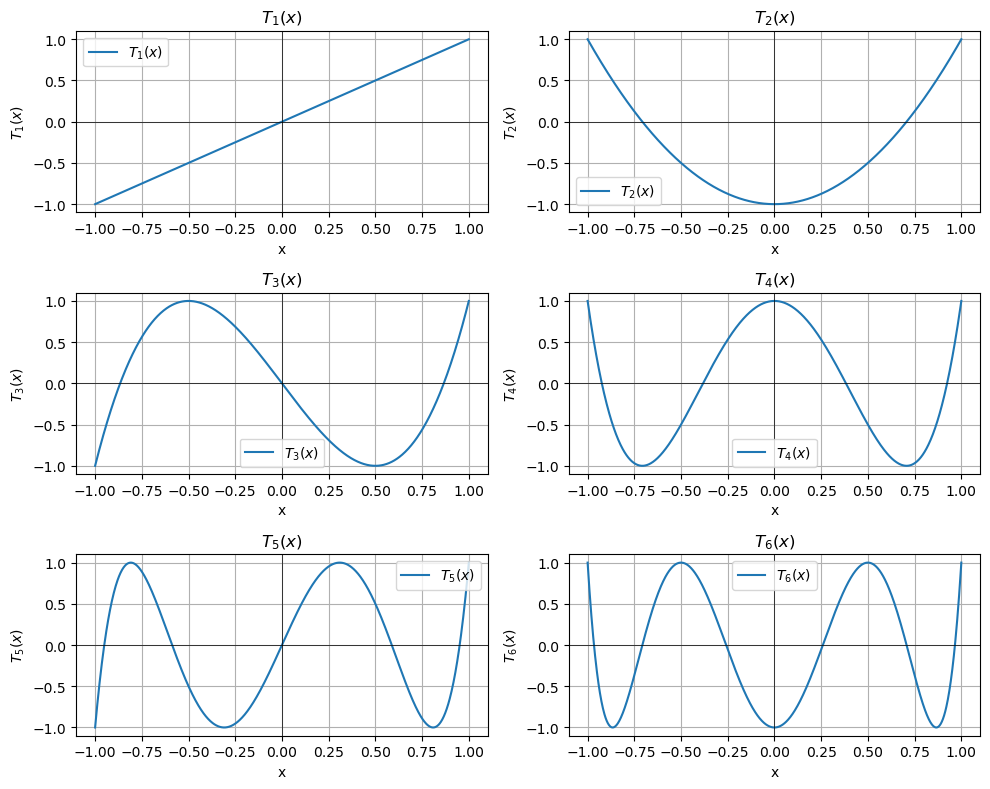

In [55]:

# Define a function to compute the Chebyshev polynomial of degree n at points x
def chebpoly(n, x):
    if n == 0:
        return np.ones_like(x)
    elif n == 1:
        return x
    else:
        T_prev = np.ones_like(x)
        T_curr = x
        for _ in range(2, n+1):
            T_next = 2 * x * T_curr - T_prev
            T_prev, T_curr = T_curr, T_next
        return T_curr

# Generate x values from -1 to 1
x = np.linspace(-1, 1, 1000)

# Create a subplot and plot each T_n in its own subplot
plt.figure(figsize=[10,8])
for n in range(1, 7):  # for n=1 to n=6
    plt.subplot(3, 2, n)
    plt.plot(x, chebpoly(n, x), label=f'$T_{n}(x)$')
    plt.title(f'$T_{n}(x)$')
    plt.xlabel('x')
    plt.ylabel(f'$T_{n}(x)$')
    plt.grid(True)
    plt.axhline(0, color='black',linewidth=0.5)
    plt.axvline(0, color='black',linewidth=0.5)
    plt.legend()

plt.tight_layout()
plt.show()


### The plots above DO NOT show the Chebyshev points, which are the extremes of each curve: thus the numbers of Chebyshev points in the six plots are 2, 3, 4, 5, 6, and 7.

In [66]:
import numpy as np

def chebyshev_coeffs(n):
    """Compute coefficients of the Chebyshev polynomial of degree n."""
    if n == 0:
        return np.array([1])
    elif n == 1:
        return np.array([1, 0])
    else:
        coeffs_prev = np.array([1, 0])  # Coefficients for T1
        coeffs = np.array([2, 0, -1])   # Coefficients for T2
        
        for _ in range(3, n+1):
            coeffs_new = np.zeros(len(coeffs) + 1)
            coeffs_new[:-1] += 2 * coeffs
            coeffs_new[2:] -= coeffs_prev
            coeffs_prev, coeffs = coeffs, coeffs_new
        
        return coeffs

# Display coefficients for T_1 through T_6
for n in range(1, 7):
    coeffs = chebyshev_coeffs(n)
    print(f"Coefficients of T_{n}(x): {coeffs[::-1]}")

Coefficients of T_1(x): [0 1]
Coefficients of T_2(x): [-1  0  2]
Coefficients of T_3(x): [ 0. -3.  0.  4.]
Coefficients of T_4(x): [ 1.  0. -8.  0.  8.]
Coefficients of T_5(x): [  0.   5.   0. -20.   0.  16.]
Coefficients of T_6(x): [ -1.   0.  18.   0. -48.   0.  32.]


So, for example, $T_5(x)=0x^5+5x^4+0x^3-20x^2+0x$

Given a chebyshev expansion of degree n and examines the resulting Chebysheg coeffcients. If seeveral of these in a row fall below a level of approximately $10^{-15}$ , then the grid is judged to be fune enough. For example, here are the Chebyshev coefficients of corresponding to $e^x$:

In [76]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial import chebyshev as C

# Define the function
def f(x):
    return np.exp(x)

# Number of points to use for interpolation
N = 15

# Chebyshev points
x_cheb = np.cos(np.pi * (np.arange(N) + 0.5) / N)

# Compute the Chebyshev coefficients of e^x using interpolation at Chebyshev points
coeffs = C.chebfit(x_cheb, f(x_cheb), N-1)

# Displaying the coefficients
for i, coeff in enumerate(coeffs):
    print(f"a_{i}: {coeff:.15f}")


a_0: 1.266065877752009
a_1: 1.130318207984970
a_2: 0.271495339534077
a_3: 0.044336849848664
a_4: 0.005474240442094
a_5: 0.000542926311915
a_6: 0.000044977322954
a_7: 0.000003198436462
a_8: 0.000000199212481
a_9: 0.000000011036771
a_10: 0.000000000550589
a_11: 0.000000000024979
a_12: 0.000000000001039
a_13: 0.000000000000039
a_14: 0.000000000000001


### Notice that the last coefficient is about at the level of machine precision. For complicated functions it is often more interesting to plot the coefficients than to list them. For example:

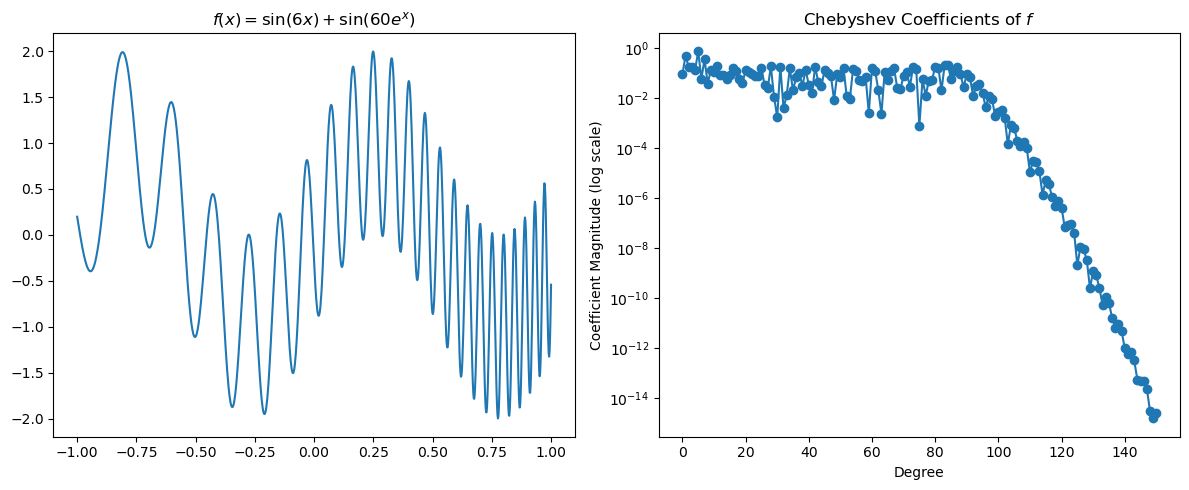

In [83]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial.chebyshev import chebfit

# Define the function
def f(x):
    return np.sin(6*x) + np.sin(60*np.exp(x))

# Generate x values
x = np.linspace(-1, 1, 1000)

# Compute Chebyshev coefficients for a given degree
degree = 150  # Adjust the degree as desired
coeffs = chebfit(x, f(x), degree)

# Plot the function f
plt.figure(figsize=[12, 5])
plt.subplot(1, 2, 1)
plt.plot(x, f(x))
plt.title(r'$f(x) = \sin(6x) + \sin(60e^x)$')

# Plot the Chebyshev coefficients
plt.subplot(1, 2, 2)
plt.semilogy(np.abs(coeffs), 'o-')
plt.title('Chebyshev Coefficients of $f$')
plt.xlabel('Degree')
plt.ylabel('Coefficient Magnitude (log scale)')

# Show the plots
plt.tight_layout()
plt.show()


In [82]:
coeffs_length = len(coeffs)
print(f"Length of coeffs (Number of Chebyshev Coefficients): {coeffs_length}")


Length of coeffs (Number of Chebyshev Coefficients): 15


What we do:

- First, calculate the polynomial interpolant through the function sampled at 9 Chebyshev points (i.e. a polynomial of degree 8), and check whether the Chebyshev coefficients appear to be small enough.
- For this example, the answer is no. Then it tries 17 points, then 33, then 65, and so on.
- In this case, our algorithm judges at 256 points that the CHebyshev coefficients have fallen to the level of rounding error. 
- At this point, it truncates the tail of terms demmed to be neglible, leaving a series of 151 terms. The corresponding degree 150 polynomial is then evaluated at 151 Chebyshev points via FFT, and these 151 numbers become the data defining this particular function. Engineers would say that the signal has been downsampled from 257 points to 151.

## FOR DISCUSSION


**People often ask, is there anything special about Chebyshev points and
Chebyshev polynomials? Could we equally well interpolate in other points and
expand in other sets of polynomials? From an approximation point of view, the
answer is yes, and in particular, Legendre points and Legendre polynomials have
much the same power for representing a general function f, as we shall see in
Chapters 17–19. Legendre points and polynomials are neither much better than
Chebyshev for approximating functions, nor much worse; they are essentially
the same. One can improve upon both Legendre and Chebyshev, shrinking the
number of sample points needed to represent a given function by a factor of up
to π/2, but to do so one must leave the class of polynomials. See Chapter 22.
Nevertheless, there is a big advantage of Chebyshev over Legendre points,
and this is that one can use the FFT to go from point values to coefficients and
back again. There are algorithms that make such computations practicable for
Legendre interpolants too [Piessens 1974, Alpert & Rokhlin 1991, Dutt, Gu &
Rokhlin 1996, Potts, Steidl & Tasche 1998, Iserles 2011]—see also Theorem 19.6
of this book—but Chebyshev remains the easiest case.**